In [1]:
import os
import tensorflow as tf
import keras
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
import os
import shutil
from keras.preprocessing import image
import cv2

In [2]:
img_withmask_dir = "dataset/with_mask"
img_witouthmask_dir = "dataset/without_mask"
img_test_onmask_dir = "dataset/test_me/onmask"
img_test_offmask_dir = "dataset/test_me/offmask"
size = 64

In [3]:
def preprocess_image(img_path):
    img = keras.utils.load_img(img_path, target_size=(size,size))
    tensor = keras.utils.img_to_array(img)
    tensor /= 255.0 
    return tensor

In [4]:
categories = ["mask", "nomask"]
nb_class = len(categories)
x = []
y = []

# variables to test the face with a mask
test_on_mask_x = []
test_on_mask_y = []

# variables to test the face with a mask
test_off_mask_x = []
test_off_mask_y = []

In [5]:
# preprocess the images, each of which is a face with mask
for i in os.listdir(img_withmask_dir):
    img_path = os.path.join(img_withmask_dir, i)
    img_tensor = preprocess_image(img_path)
    x.append(img_tensor)
    y.append(0)

In [6]:
# preprocess the images, each of which is a face without mask
for i in os.listdir(img_witouthmask_dir):
    img_path = os.path.join(img_witouthmask_dir, i)
    img_tensor = preprocess_image(img_path)
    x.append(img_tensor)
    y.append(1)

In [7]:
x = np.array(x)
y = np.array(y)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1)
Y_train = keras.utils.to_categorical(Y_train, 2)
Y_test = keras.utils.to_categorical(Y_test, 2)

In [8]:
# make a deep learning model
model = keras.models.Sequential()
# Conv2D
# the # of convolution filters 
# the number of rows and columns in terms of a convolution kernel
# padding
#...
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(size, size, 3)))
# start - add custum layers

# end - add custum layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="linear"))
model.add(keras.layers.Dense(2, activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 16,778,498
Trainable params: 16,778,498
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(optimizer="sgd", loss="hinge", metrics=["accuracy"])

In [10]:
model.fit(X_train, Y_train, epochs=5, validation_split=0.1)

Epoch 1/5
17/17 [==============================] - 2s 74ms/step - loss: 0.9222 - accuracy: 0.5722 - val_loss: 0.9123 - val_accuracy: 0.5902
Epoch 2/5
17/17 [==============================] - 1s 72ms/step - loss: 0.9113 - accuracy: 0.5870 - val_loss: 0.9102 - val_accuracy: 0.5902
Epoch 3/5
17/17 [==============================] - 1s 76ms/step - loss: 0.9005 - accuracy: 0.5870 - val_loss: 0.8663 - val_accuracy: 0.5902
Epoch 4/5
17/17 [==============================] - 1s 73ms/step - loss: 0.8142 - accuracy: 0.7333 - val_loss: 0.7100 - val_accuracy: 0.9180
Epoch 5/5
17/17 [==============================] - 1s 72ms/step - loss: 0.7717 - accuracy: 0.7593 - val_loss: 0.6409 - val_accuracy: 0.9180


In [11]:
# evaluate a deep learning model
prediction = model.predict(X_test)
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

3/3 [==============================] - 0s 11ms/step
3/3 - 0s - loss: 0.6610 - accuracy: 0.9104 - 65ms/epoch - 22ms/step


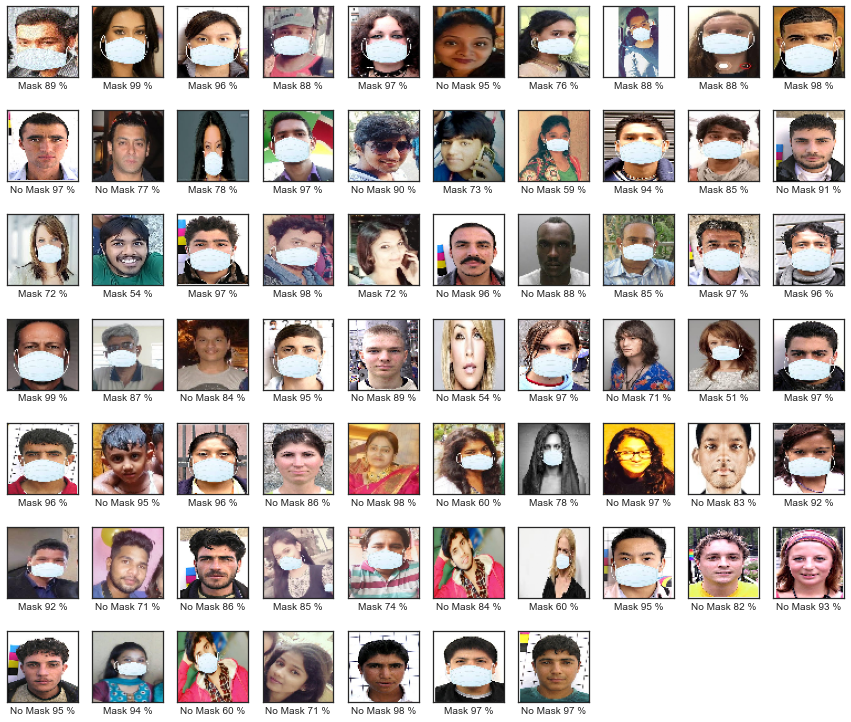

In [12]:
 # draw images with accuracies and labels
topCnt = 8 *10
if len(X_test) < topCnt:
    topCnt = len(X_test)
    
plt.figure(figsize=(15,15))
for idx in range(topCnt):
    plt.subplot(8, 10, idx+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[idx], cmap=plt.cm.binary)
    
    if prediction[idx][0] > prediction[idx][1]:
        label = "Mask " + str(int(prediction[idx][0] * 100)) + " %"
    else:
        label = "No Mask " + str(int(prediction[idx][1] * 100)) + " %"
    plt.xlabel(label)
plt.show()